## 深度学习的数学基础之 几何与线性代数
### 1. 向量的几何
### 2. 向量的点乘和 夹角
- 余弦相似度
- 超平面: 
    - 二维: 假设 w = [2,1], 且v * w = 1, 令 v = [x, y] 则 有直线: 2x + y = 1, 这条直线上的所有点都有: ||v|| cos(𝜃) = 1 / sqrt(5)
    - 三维: 假设 w = [1,2,3], 且v * w = 1, 令 v = [x,y,x], 则 有平面 x + 2y + 3z = 1, 
- 
### 3. 安装 MXNet 依赖: 
    - np为深度学习提供类似Numpy的接口: `pip install https://apache-mxnet.s3-accelerate.amazonaws.com/dist/python/numpy/latest/mxnet-1.5.0-cp37-cp37m-macosx_10_11_x86_64.whl`
    - np的两大模块:
        - `np`: 类似Numpy
        - `npx`: 提供给深度学习用的运算符
### 4. 爱因斯坦求和约定(爱因斯坦标记法)
- 例子: 设A, B 是向量
    - 向量A的元素求和: `np.einsum('i->', A)`
    - 按元素相乘: `np.einsum('i,i->i', A, B)`
    - 点积/内积: `np.einsum('i,i->', A, B) # or just use 'i,i'`
    - 外积: `np.einsum('i,j->ij', A, B)`, 用右边的矩阵乘以左边矩阵的每个元素
- 例子: 设C 是二维矩阵
    - 矩阵的迹: `np.einsum('ii', C)`
    - 按元素相乘: `np.einsum('ij,ji->ij', C, D)`
    - 矩阵的点积: `np.einsum('ij,kl->ij', C, D)`
    - 矩阵的外积: `np.einsum('ij, kl -> ijkl', C, D)`

### 5. MXNet 的 np 与 numpy的比较
- linalg模块, numpy的比较齐全, np只有转置和求L2范数
- mxnet.np的array 不能直接用于 numpy的方法

### 6. Numpy Pretty Print Matrix
- 可以用with, 使设置范围缩小在可控区域内
- 设置小数精度: `np.set_printoptions(precision=3)`
- 格式化元素: `np.set_printoptions(formatter={'float': '{: 0.3f}'.format})`
- 对 科学计数法的小数 四舍五入: `np.set_printoptions(suppress=True)` 
- 


In [78]:
from IPython import display
from mxnet import gluon, nd, ndarray, np, npx  # np和npx需要安装
from mxnet.gluon.data.vision import FashionMNIST
from matplotlib import pyplot as plt
npx.set_np()
%matplotlib inline

In [45]:
import mxnet 
mxnet.__version__

'1.5.0'

In [106]:
np.linalg.mat_rank

AttributeError: module 'mxnet.numpy.linalg' has no attribute 'mat_rank'

In [20]:
npx.set_np?

In [22]:
# 计算 向量的夹角
def angle(v, w):
    np.arccos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))
    return 

In [18]:
angle(np.array([0, 1, 2]), np.array([2, 3, 4]))  

2.236068
5.3851647
11.0


array(0.41899002)

In [53]:
# 试试 orthogonal: pi/2
orthogonal_angle = angle(np.array([0, 1]), np.array([1, 0]))  
orthogonal_angle

array(1.5707964)

In [52]:
orthogonal_angle?

In [41]:
orthogonal_angle.asscalar()  # 为什么转不了 标量

AttributeError: mxnet.numpy.ndarray object has no attribute asscalar

In [54]:
float(orthogonal_angle)

1.5707963705062866

In [56]:
orthogonal_angle.item?

In [60]:
np.array([1]).item()

1.0

In [62]:
# 找一个超平面, classify 两个类别的图片
train_set = FashionMNIST(train=True)
test_set = FashionMNIST(train=False)

In [72]:
for i, (sample_X, sample_y) in enumerate(train_set):
    pass
print(i+1)
for i, (sample_X, sample_y) in enumerate(test_set):
    pass
print(i+1)

60000
10000


In [82]:
t_shirt_train = np.stack([x[0] for x in train_set if x[1] == 0]).astype(float)
trousers_train = np.stack([x[0] for x in train_set if x[1] == 1]).astype(float)
X_test = np.stack(
    [x[0] for x in test_set if x[1] == 0 or x[1] == 1]).astype(float)
y_test = np.stack(
    [x[1] for x in test_set if x[1] == 0 or x[1] == 1]).astype(float)

In [73]:
t_shirt_train.shape

(6000, 28, 28, 1)

In [74]:
trousers_train.shape

(6000, 28, 28, 1)

In [75]:
ave_t_shirt = np.mean(t_shirt_train, axis=0)
ave_trousers = np.mean(trousers_train, axis=0)

In [77]:
ave_t_shirt.shape

(28, 28, 1)

In [79]:
def set_figsize(figsize=(3.5, 2.5)):
    """Change the default figure size"""
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize

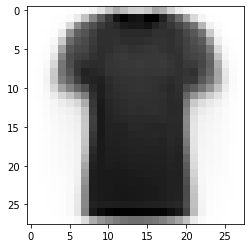

In [80]:
plt.imshow(ave_t_shirt.reshape(28, 28).tolist(), cmap='Greys')
plt.show()

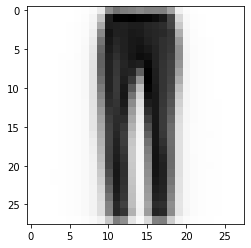

In [81]:
plt.imshow(ave_trousers.reshape(28, 28).tolist(), cmap='Greys')
plt.show()

In [83]:
# 找一个超平面, classify 两个类别的图片
w = (ave_trousers - ave_t_shirt).T
predictions = X_test.reshape(2000, -1).dot(w.flatten()) > -1500000  # 阈值
np.mean(predictions.astype(y_test.dtype) == y_test, dtype=np.float64)

array(0.801, dtype=float64)

In [88]:
# 计算矩阵的秩和逆矩阵
M = np.array([[1, 2], [1, 4]])
M_inv = np.array([[2, -1], [-0.5, 0.5]])
M.dot(M_inv)

array([[1., 0.],
       [0., 1.]])

In [164]:
def mat_inv(arr):
    from numpy.linalg import inv
    return inv(arr.asnumpy())

In [165]:
mat_inv(M)

array([[ 2. , -1. ],
       [-0.5,  0.5]], dtype=float32)

In [113]:
def mat_rank(arr):
    from numpy.linalg import matrix_rank
    return matrix_rank(arr.asnumpy())

In [114]:
assert mat_rank(np.array([[1,2], [2,4]])) == 1

In [95]:
# 计算行列式
def det(arr):
    import numpy as np
    return np.linalg.det(arr)

In [96]:
det(np.array([[1, -1], [2, 3]]))

TypeError: No loop matching the specified signature and casting
was found for ufunc det

In [97]:
np.array([[1, -1], [2, 3]])

array([[ 1., -1.],
       [ 2.,  3.]])

In [101]:
# 练习
# 1. 计算两个向量的夹角
v_1 = np.array([1, 0, -1, 2])
v_2 = np.array([3, 1, 0, 1])
angle(v_1, v_2)

array(0.9078301)

In [102]:
# 2. 计算两个 矩阵是不是互为逆矩阵
m_1 = np.array([[1,2], [0,1]])
m_2 = np.array([[1, -2], [0, 1]])
m_1.dot(m_2)

array([[1., 0.],
       [0., 1.]])

In [125]:
# 3. 这几个向量是不是线性独立的(纵向?)  -> 秩为n, 或者 齐次线性方程组仅有零解
m_1 = np.array([[1,2,3], [0,1,1], [-1,-1,1]])
m_2 = np.array([[3,1,0], [1,1,0], [1,1,0]])
m_3 = np.array([[1,0,1], [1,1,0], [0,-1,1]])
m_1

array([[ 1.,  2.,  3.],
       [ 0.,  1.,  1.],
       [-1., -1.,  1.]])

In [118]:
print("M1 rank: ", mat_rank(m_1))  # 
print("M2 rank: ", mat_rank(m_2))  
print("M3 rank: ", mat_rank(m_3))

M1 rank:  3
M2 rank:  2
M3 rank:  2


In [135]:
def einsum(notation, *matrices):
    import numpy as np
    matrices = [m.asnumpy() for m in matrices]
    return np.einsum(notation, *matrices)

In [140]:
einsum("ii ->", m_1)

3.0

In [141]:
einsum('i -> ', np.array([1,2,3]))

6.0

In [152]:
einsum('i,i->i', np.array([[1,2,3]]), m_1)

ValueError: operand has more dimensions than subscripts given in einstein sum, but no '...' ellipsis provided to broadcast the extra dimensions.

In [151]:
np.array([[1,2,3]]).dot(m_1)

array([[-2.,  1.,  8.]])

In [156]:
m_1

array([[ 1.,  2.,  3.],
       [ 0.,  1.,  1.],
       [-1., -1.,  1.]])

In [157]:
m_2

array([[3., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [158]:
strange_multiply = einsum('ij,kl->ijkl', m_1, m_2)

In [161]:
strange_multiply[0][0]

array([[3., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.]], dtype=float32)

In [162]:
einsum('ij,kl->ij', m_1, m_2)

array([[ 8., 16., 24.],
       [ 0.,  8.,  8.],
       [-8., -8.,  8.]], dtype=float32)

In [163]:
'{: 0.3f}'.format

<function str.format>